In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import Path

from srvpy.open import Registration
from srvpy.open.schemes import VInf
from srvpy.open.paths import KNIGHT, BISHOP

# Shapes in the Complex Plane

This is a demonstration on computing shape space geodesics using the srvpy package. 

We start by loading the curves. In this example, we use example SVG paths representing `srvpy.open.paths.KNIGHT` and `srvpy.open.paths.BISHOP` representing chess pieces knight and bishop. The paths are converted into point evaluations in the complex plane.

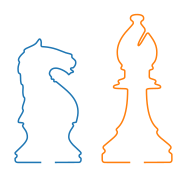

In [2]:
# Construct path using svgpathtools and compute their lengths
path1 = Path(KNIGHT)
path2 = Path(BISHOP)
l1 = path1.length()
l2 = path2.length()

# Evaluate the paths at 1000 points
n = 1000
t = np.linspace(0,1,n+1)
c1 = np.array([path1.point(t) for t in t])
c2 = np.array([path2.point(t) for t in t])

# Plot the shapes
plt.figure(figsize=(10,3))
plt.plot(c1.real,c1.imag)
plt.plot(c2.real+25,c2.imag)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

### The Registration object

The `Registration` object is the object used to register curves and compute shape space geodesics. The object requires two objects of type `ndarray` representing the curves. The length of the curves can be passed as optional arguments. If they are not available, they will be estimated when `Registration.setup(self,scheme)` is called. 

### The Scheme object

In order 

In [3]:
align = Registration(c1,c2,l1=l1,l2=l2)
align.setup()

### Pre-Shape Space Geodesics

From the `Registration` object, we can compute pre-shape space geodesics, using the `Registration.preshapeGeodesic(self,tau)` method. The input argument `tau` is an `ndarray` containing the geodesic times `0<=tau<=0` for which to evaluate the geodesic. 

Since the curves are not registered, the pre-shape space geodesic do not correspond to the shape space geodesic.

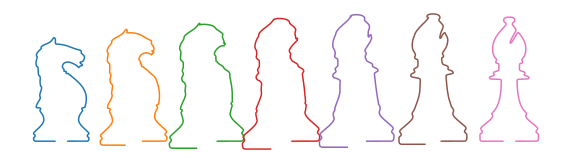

In [4]:
tau = np.linspace(0,1,7)
gamma = align.preshapeGeodesic(tau)
gamma += 25*np.arange(7)[None,:]
plt.figure(figsize=(10,3))
for i in range(7):
    plt.plot(gamma[:,i].real,gamma[:,i].imag)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

### Registering the Curves

Registration of the curves is performed using the `Registration.register()` method. This method has three steps:

- `Registration.solveHJB(self)` solves the HJB equation.
- `phi = Registration.backtrackHJB(self)` backtracks the HJB equation to obtain an estimate `phi` to the optimal reparametrization path
- `Registration.resample(self,phi)` resamples the curves stored in the `Registraion` object such that each point in `Registration.c1` and `Registration.c2` are registered to each other.

Note in particular that the attributes `c1` and `c2` are modified by the `Registration.resample` method.

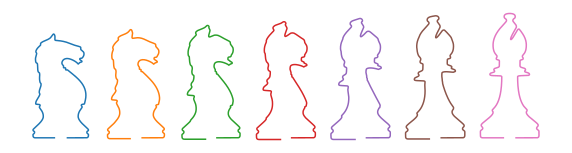

In [5]:
align.register(VInf)

gamma = align.preshapeGeodesic(tau)
gamma += 25*np.arange(7)[None,:]
plt.figure(figsize=(10,3))
for i in range(7):
    plt.plot(gamma[:,i].real,gamma[:,i].imag)
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()